9 - Hay mas en ventas PH/departamentos con mas o menos ambientes?  --> Ariel

10 - Hay mas en ventas casas/locales con mas o menos ambientes? --> Ariel

In [434]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [442]:
csv_01_2017 = pd.read_csv('filterdata/sells_01_2017.csv', low_memory=False)
csv_02_2017 = pd.read_csv('filterdata/sells_02_2017.csv', low_memory=False)
csv_03_2017 = pd.read_csv('filterdata/sells_03_2017.csv', low_memory=False)
csv_04_2017 = pd.read_csv('filterdata/sells_04_2017.csv', low_memory=False)
csv_05_2017 = pd.read_csv('filterdata/sells_05_2017.csv', low_memory=False)
csv_06_2017 = pd.read_csv('filterdata/sells_06_2017.csv', low_memory=False)

#agrupo cada 6meses del anio 2015 y creo un csv NUEVO
frames = [csv_01_2017, csv_02_2017, csv_03_2017,csv_04_2017, csv_05_2017, csv_06_2017]
sells_primero_2017 = pd.concat(frames)

In [444]:
#sells = pd.read_csv('data/Propiedades-0701.csv')
# con esto borro una columna del dataframe (id, operation, place_with_parents_name, country_name, geonames_id(ver si sirve)
# lat-lon, price_aprox_local_currency, price_usd_per_m2, price_per_m2, floor, description, title, image_thumbnail)
#sells = sells_primero_2017.drop(sells.columns[[0, 2, 5, 6, 8, 9, 10, 11, 14, 18, 19, 20, 23, 24, 25, 26]], axis=1) 
sells = sells_primero_2017.drop(sells_primero_2017.columns[[0]], axis=1)
sells.sample(10)

,created_on,property_type,place_name,place_with_parent_names,lat,lon,price,currency,price_aprox_usd,surface_in_m2,rooms,expenses
5812,2017-02-10,apartment,Barracas,|Argentina|Capital Federal|Barracas|,-34.633234,-58.374271,100000.0,USD,100000.0,NaN,2.0,NaN
10771,2017-05-18,house,Flores,|Argentina|Capital Federal|Flores|,-34.621810,-58.468427,270000.0,USD,270000.0,NaN,6.0,NaN
8902,2017-02-20,store,Haedo,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Haedo|,NaN,NaN,38000.0,USD,38000.0,NaN,NaN,NaN
9232,2017-04-22,apartment,Villa La Angostura,|Argentina|Neuquén|Villa La Angostura|,-40.762743,-71.641798,97440.0,USD,97440.0,NaN,2.0,NaN
13306,2017-04-28,apartment,Salta,|Argentina|Salta|Salta|,-24.773407,-65.411725,NaN,NaN,NaN,NaN,2.0,NaN
3212,2017-01-16,apartment,Palermo,|Argentina|Capital Federal|Palermo|,-34.589997,-58.423445,108500.0,USD,108500.0,NaN,2.0,NaN
10827,2017-05-19,apartment,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Pilar|,-34.453563,-58.884108,160000.0,USD,160000.0,NaN,4.0,NaN
5318,2017-01-26,apartment,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,NaN,77000.0,USD,77000.0,NaN,2.0,NaN
55,2017-05-01,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,-34.556407,-58.464207,265000.0,USD,265000.0,NaN,4.0,NaN
4172,2017-02-08,house,Moreno,|Argentina|Bs.As. G.B.A. Zona Oeste|Moreno|,-34.658127,-58.757103,NaN,NaN,NaN,NaN,4.0,NaN


In [471]:
#filtro los NAN de price and rooms que voy a utilizar
sells = sells[np.isfinite(sells['price'])]
sells = sells[np.isfinite(sells['rooms'])]
#filtro los de CABA/GBA
#uso regex para buscar coincidencias por string
sells_caba = sells.loc[sells['place_with_parent_names'].str.contains(r'(Capital Federal|capital federal)')]
#filtro barrio Capital Federal de caba
sells_caba = sells_caba[sells_caba['place_name']!='Capital Federal']
#filtro los de la fecha indicada
sells_caba.head(10)

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,created_on,property_type,place_name,place_with_parent_names,lat,lon,price,currency,price_aprox_usd,surface_in_m2,rooms,expenses
2,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,-34.579461,-58.477982,109000.0,USD,109000.0,NaN,1.0,NaN
3,2017-01-01,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,-34.579461,-58.477982,89900.0,USD,89900.0,NaN,1.0,NaN
5,2017-01-01,apartment,San Telmo,|Argentina|Capital Federal|San Telmo|,-34.622790,-58.377206,80000.0,USD,80000.0,NaN,3.0,NaN
22,2017-01-01,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,-34.574388,-58.448728,187000.0,USD,187000.0,NaN,3.0,NaN
44,2017-01-02,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,-34.569060,-58.451220,219000.0,USD,219000.0,NaN,3.0,4601.0
46,2017-01-02,house,Belgrano,|Argentina|Capital Federal|Belgrano|,-34.549266,-58.444699,980000.0,USD,980000.0,NaN,6.0,NaN
47,2017-01-02,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,-34.565660,-58.481028,190000.0,USD,190000.0,NaN,3.0,4500.0
54,2017-01-02,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,-34.568242,-58.456861,175000.0,USD,175000.0,NaN,4.0,NaN
90,2017-01-03,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.592864,-58.430459,189000.0,USD,189000.0,NaN,2.0,NaN
91,2017-01-03,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,-34.592917,-58.430299,197000.0,USD,197000.0,NaN,2.0,NaN


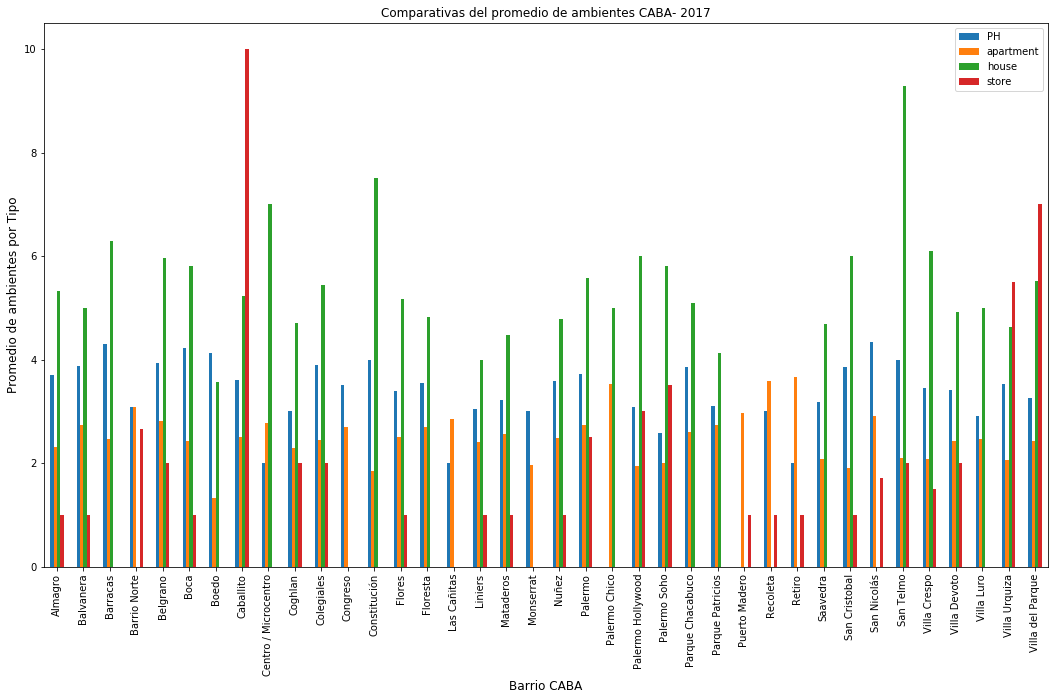

In [452]:

#ahora con todo filtrado debo obtener el promedio por zonas.
sells_caba_rooms = sells_caba.loc[:,['place_name','rooms','property_type']]
sells_caba_rooms_val = sells_caba_rooms.groupby('place_name').count()
sells_caba_rooms_res = sells_caba_rooms[sells_caba_rooms['place_name']\
                                        .isin(sells_caba_rooms_val[sells_caba_rooms_val['rooms'] > 100].index)]
#sells_caba_rooms_res = sells_caba_rooms_res[sells_caba_rooms_res['place_name'] == 'San Telmo']
#sells_caba_rooms_res.head(100)
plt_caba = sells_caba_rooms_res.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=False)

import matplotlib.pyplot as plt
plt_caba.set_xlabel("Barrio CABA", fontsize=12)
plt_caba.set_ylabel("Promedio de ambientes por Tipo", fontsize=12)
plt_caba.set_title("Comparativas del promedio de ambientes CABA- 2017")
plt_caba.legend(['PH', 'apartment', 'house', 'store'])
plt.show()


/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


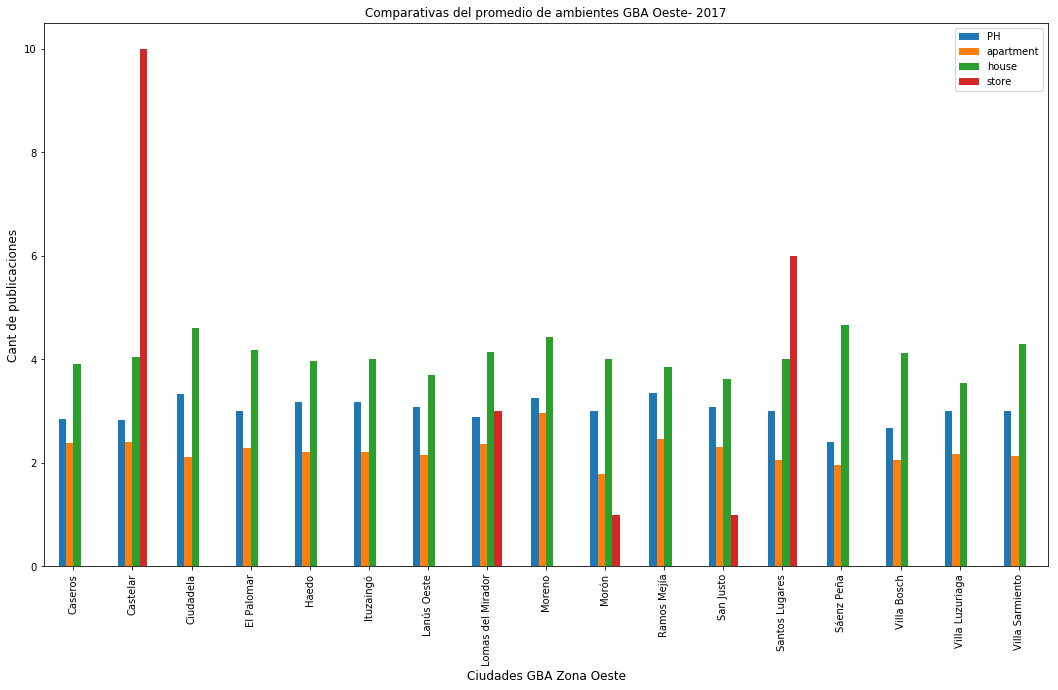

In [483]:
#ahora hago lo mismo con GBA
#uso regex para buscar coincidencias por string
sells_gba_west = sells.loc[sells['place_with_parent_names'].str.contains(r'(G.B.A.*Oeste)')]
#filtro los de la zona indicada
sells_gba_west = sells_gba_west[sells_gba_west['place_name']!='Bs.As. G.B.A. Zona Oeste']

#ahora con todo filtrado debo obtener el promedio por zonas.
sells_gba_west_rooms = sells_gba_west.loc[:,['place_name','rooms','property_type']]
sells_gba_west_rooms_val = sells_gba_west_rooms.groupby('place_name').count()
sells_gba_west_rooms_res = sells_gba_west_rooms[sells_gba_west_rooms['place_name']\
                                        .isin(sells_gba_west_rooms_val[sells_gba_west_rooms_val['rooms'] > 50].index)]

plt_gba_west = sells_gba_west_rooms_res.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=False)

import matplotlib.pyplot as plt
plt_gba_west.set_xlabel("Ciudades GBA Zona Oeste", fontsize=12)
plt_gba_west.set_ylabel("Cant de publicaciones", fontsize=12)
plt_gba_west.set_title("Comparativas del promedio de ambientes GBA Oeste- 2017")
plt_gba_west.legend(['PH', 'apartment', 'house', 'store'])
plt.show()

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


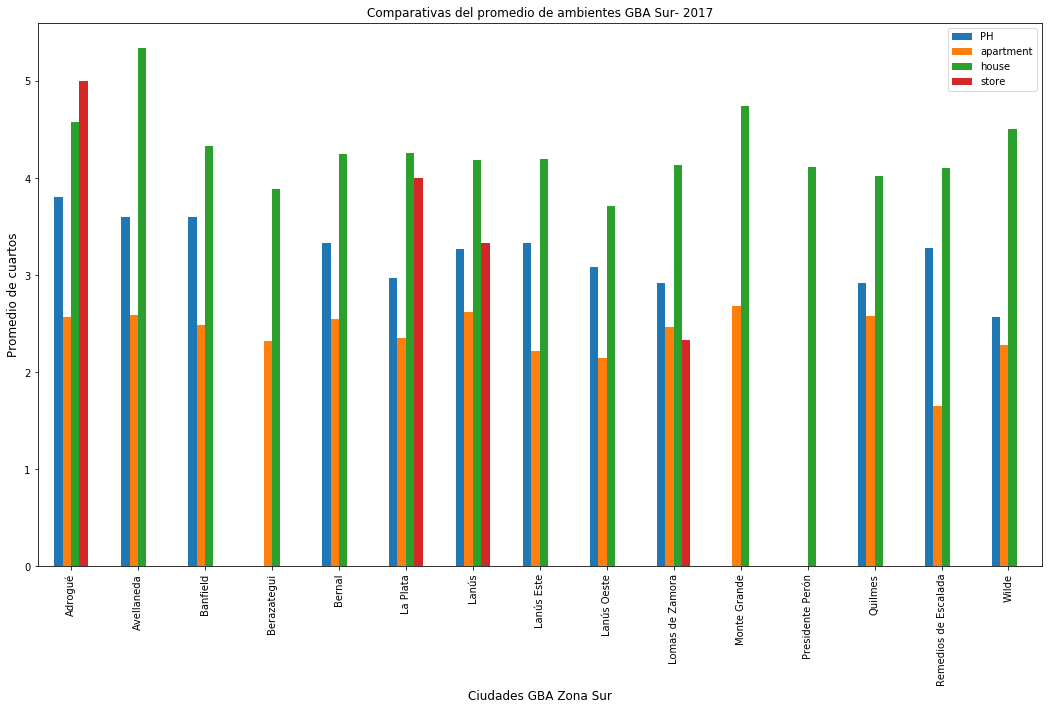

In [485]:
#filtro las publicaciones de gba del sur
sells_gba_south = sells.loc[sells['place_with_parent_names'].str.contains(r'(G.B.A.*Sur|G.B.A.*sur)')]

#ahora con todo filtrado debo obtener el promedio por zonas.
sells_gba_south_rooms = sells_gba_south.loc[:,['place_name','rooms','property_type']]
sells_gba_south_rooms_val = sells_gba_south_rooms.groupby('place_name').count()
sells_gba_south_rooms_res = sells_gba_south_rooms[sells_gba_south_rooms['place_name']\
                                        .isin(sells_gba_south_rooms_val[sells_gba_south_rooms_val['rooms'] > 40].index)]
plt_gba_south = sells_gba_south_rooms_res.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=False)

import matplotlib.pyplot as plt
plt_gba_south.set_xlabel("Ciudades GBA Zona Sur", fontsize=12)
plt_gba_south.set_ylabel("Promedio de cuartos", fontsize=12)
plt_gba_south.set_title("Comparativas del promedio de ambientes GBA Sur- 2017")
plt_gba_south.legend(['PH', 'apartment', 'house', 'store'])
plt.show()

/home/ariel/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


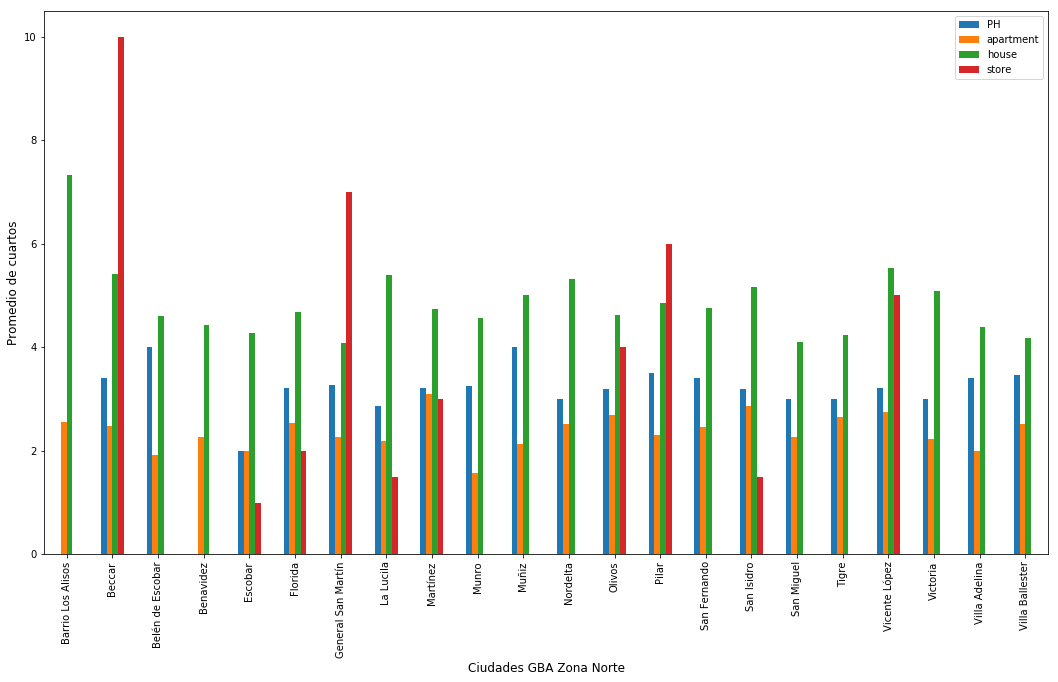

In [487]:
#filtro las publicaciones de gba norte
sells_gba_north = sells.loc[sells['place_with_parent_names'].str.contains(r'(G.B.A.*Norte|G.B.A.*norte)')]

#ahora con todo filtrado debo obtener el promedio por zonas.
sells_gba_north_rooms = sells_gba_north.loc[:,['place_name','rooms','property_type']]
sells_gba_north_rooms_val = sells_gba_north_rooms.groupby('place_name').count()
sells_gba_north_rooms_res = sells_gba_north_rooms[sells_gba_north_rooms['place_name']\
                                        .isin(sells_gba_north_rooms_val[sells_gba_north_rooms_val['rooms'] > 50].index)]

plt_gba_north = sells_gba_north_rooms_res.groupby(['place_name', 'property_type']).mean().unstack().plot(kind='bar',figsize=(18,10), stacked=False)

import matplotlib.pyplot as plt
plt_gba_north.set_xlabel("Ciudades GBA Zona Norte", fontsize=12)
plt_gba_north.set_ylabel("Promedio de cuartos", fontsize=12)
plt_gba_north.legend(['PH', 'apartment', 'house', 'store'])
plt.show()

11 - Promedios de balcones(depto)/patios(casas,PH) de las propiedades en ventas? --> Ariel